### SURVIVAL ANALYSIS(PREDICTIVE MAINTENANCE)

In [48]:
!pip install lifelines --quiet

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter,CoxPHFitter

In [50]:
df = pd.read_excel("Haul_Machines.xlsx")

In [51]:
print(df.head(5))
print(df.info())
print(df.shape)

  Machine_ID  Hours_Operated  Breakdowns Last_Service_Date
0    Drill_1             922           3        2024-01-25
1    Truck_1            1871           2        2024-05-11
2    Drill_2            1346           1        2024-12-19
3    Truck_2            1954           2        2024-07-15
4    Drill_3             111           1        2024-10-08
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Machine_ID         50 non-null     object        
 1   Hours_Operated     50 non-null     int64         
 2   Breakdowns         50 non-null     int64         
 3   Last_Service_Date  50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.7+ KB
None
(50, 4)


In [52]:
df["Last_Service_Date"] = pd.to_datetime(df["Last_Service_Date"])
latest_date = df["Last_Service_Date"].max()
df["Days_Since_Service"] = (latest_date - df["Last_Service_Date"]).dt.days

In [53]:
df["Event"] = np.where(df["Breakdowns"] > 0,1,0 )
df["Duration"] = df["Hours_Operated"]

In [54]:
kmf = KaplanMeierFitter()
kmf.fit(durations = df["Duration"],event_observed =df["Event"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 50 total observations, 8 right-censored observations>

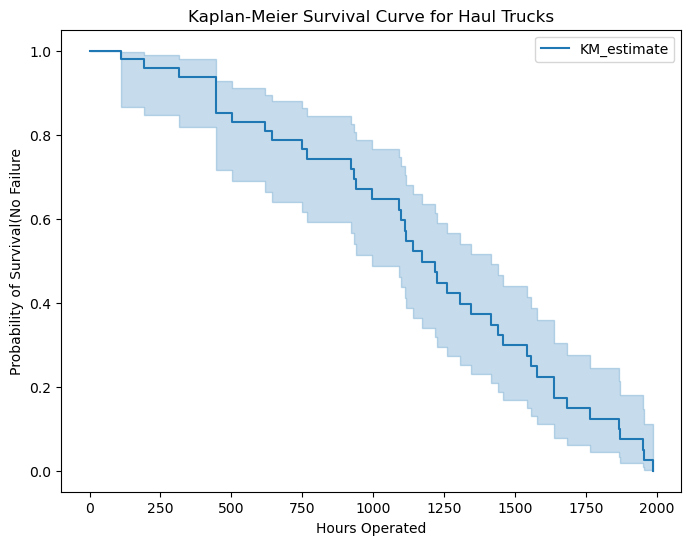

In [55]:
plt.figure(figsize = (8,6))
kmf.plot_survival_function(ci_show = True)
plt.title("Kaplan-Meier Survival Curve for Haul Trucks")
plt.xlabel("Hours Operated")
plt.ylabel("Probability of Survival(No Failure")
plt.legend()
plt.show()

In [56]:
cph = CoxPHFitter()
cph.fit(df[["Duration","Event","Breakdowns","Days_Since_Service"]],
        duration_col = "Duration",event_col = "Event")


<lifelines.CoxPHFitter: fitted with 50 total observations, 8 right-censored observations>

In [57]:
print("\nCox Proportional Hazards Summary:")
cph.print_summary()


Cox Proportional Hazards Summary:


<lifelines.CoxPHFitter: fitted with 50 total observations, 8 right-censored observations>
             duration col = 'Duration'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 50
number of events observed = 42
   partial log-likelihood = -117.55
         time fit was run = 2025-09-16 22:33:27 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
Breakdowns         -0.21      0.81      0.11           -0.43            0.02                0.65                1.02
Days_Since_Service  0.00      1.00      0.00           -0.00            0.01                1.00                1.01

                    cmp to     z    p  -log2(p)
covariate                                      
Breakdowns            0.00 -1.82 0.07      3.87
Days_Since_Service    0.00  0.59 0.56      0.84
---
Concordance = 0.66
Partial AIC = 239.10
log-likelihood ratio test = 3.65 on 2 df
-log2(p) of ll-ratio test = 2.63

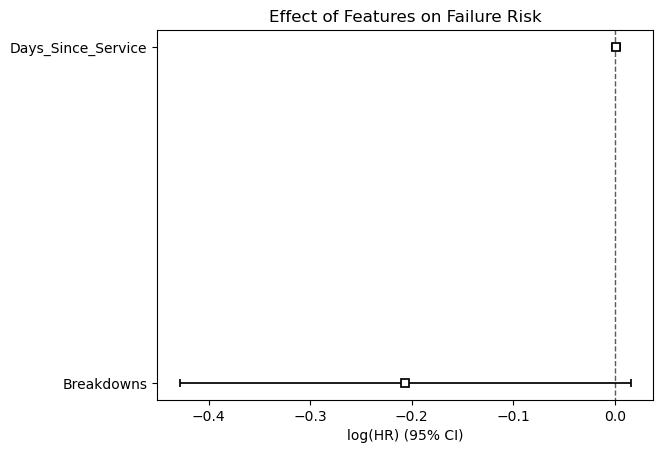

In [58]:
cph.plot()
plt.title("Effect of Features on Failure Risk")
plt.show()